<a href="https://colab.research.google.com/github/BaimMudrik182/UAS/blob/main/Prediksi%20Rawan%20Banjir%20di%20KAB.Mukomuko.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Tell me about this dataset.

Here is all the data you need:
"data_nonspasial_kecamatan_mukomuko.csv"

## Data loading

### Subtask:
Load the dataset "data_nonspasial_kecamatan_mukomuko.csv" into a pandas DataFrame.


**Reasoning**:
Load the dataset "data_nonspasial_kecamatan_mukomuko.csv" into a pandas DataFrame and display its first few rows and shape.



In [ ]:
import pandas as pd

try:
    df = pd.read_csv('data_nonspasial_kecamatan_mukomuko.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'data_nonspasial_kecamatan_mukomuko.csv' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

,kecamatan,curah_hujan,ketinggian_lahan,kemiringan,kepadatan_penduduk,kejadian_banjir,label
0,Air Dikit,236,37,6.3,82,0,0
1,Air Manjunto,239,21,5.5,142,2,0
2,Ipuh,233,51,5.1,163,5,0
3,Kota Mukomuko,201,31,3.7,81,2,0
4,Lubuk Pinang,229,15,5.6,174,4,0


(15, 7)


## Data exploration

### Subtask:
Explore the dataset to understand its structure, including the number of rows and columns, data types of each column, and summary statistics. Identify potential missing values and outliers.


**Reasoning**:
Examine the data types, descriptive statistics, missing values, and unique value counts to understand the dataset's structure and potential issues.



In [ ]:
# Examine data types
print(df.info())

# Generate descriptive statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Explore unique values and frequencies for categorical features
print(df['kecamatan'].value_counts())
print(df['label'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   kecamatan           15 non-null     object 
 1   curah_hujan         15 non-null     int64  
 2   ketinggian_lahan    15 non-null     int64  
 3   kemiringan          15 non-null     float64
 4   kepadatan_penduduk  15 non-null     int64  
 5   kejadian_banjir     15 non-null     int64  
 6   label               15 non-null     int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 972.0+ bytes
None
       curah_hujan  ketinggian_lahan  kemiringan  kepadatan_penduduk  \
count    15.000000         15.000000   15.000000           15.000000   
mean    253.933333         30.466667    4.640000          125.333333   
std      35.642003         13.075969    1.648722           35.346583   
min     201.000000         11.000000    1.500000           81.000000   
25%     234.500000       

## Data analysis

### Subtask:
Analyze the data to understand the distribution of key variables and identify any interesting patterns or relationships between variables. Calculate descriptive statistics for numerical features and explore categorical features.  Pay special attention to the relationship between the numerical features and the 'label' column.


**Reasoning**:
Analyze the distribution of numerical features and their relationship with the 'label' column. Calculate descriptive statistics for each numerical feature grouped by 'label'. Explore the relationship between the categorical feature 'kecamatan' and the 'label'.



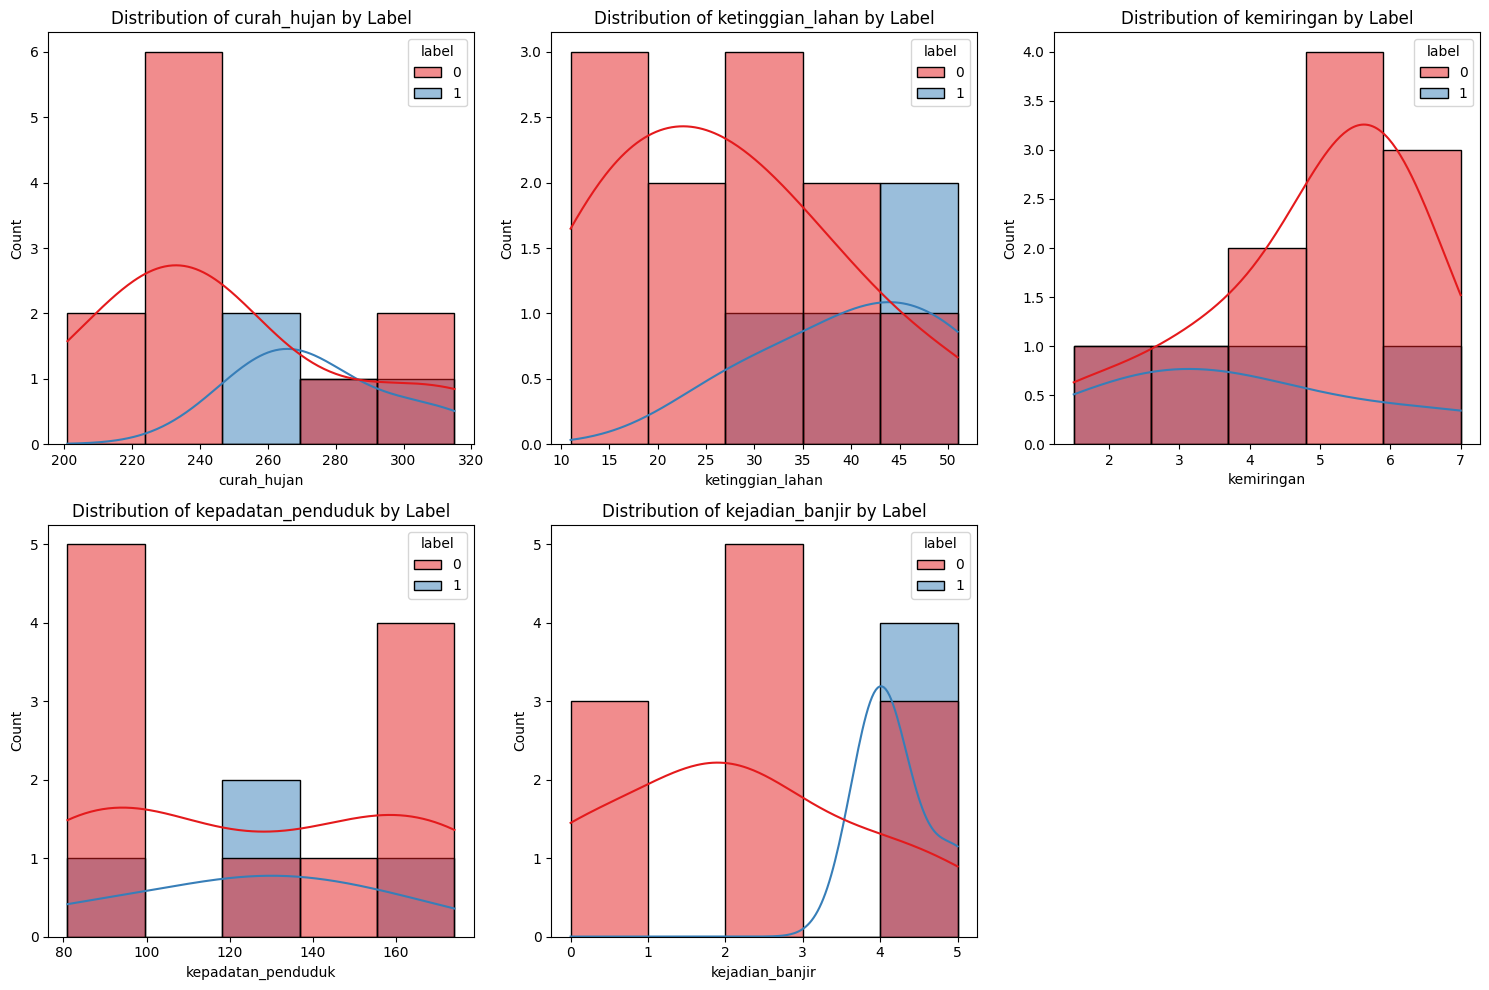


Descriptive statistics for curah_hujan by label:
             mean  median        std
label                               
0      246.363636   238.0  37.219008
1      274.750000   269.5  22.867371

Descriptive statistics for ketinggian_lahan by label:
            mean  median        std
label                              
0      26.727273    27.0  12.361965
1      40.750000    42.0   9.810708

Descriptive statistics for kemiringan by label:
           mean  median       std
label                            
0      4.845455    5.50  1.527327
1      4.075000    3.45  2.080665

Descriptive statistics for kepadatan_penduduk by label:
             mean  median        std
label                               
0      125.818182   126.0  37.846580
1      124.000000   126.5  32.444825

Descriptive statistics for kejadian_banjir by label:
           mean  median       std
label                            
0      2.090909     2.0  1.700267
1      4.250000     4.0  0.500000

Proportion of labels b

label,0,1
kecamatan,,
Air Dikit,1.0,0.0
Air Manjunto,1.0,0.0
Air Rami,1.0,0.0
Ipuh,1.0,0.0
Kota Mukomuko,1.0,0.0
Lubuk Pinang,1.0,0.0
Malin Deman,0.0,1.0
Marga Sakti Sebelat,0.0,1.0
Penarik,1.0,0.0


<Figure size 1000x600 with 0 Axes>

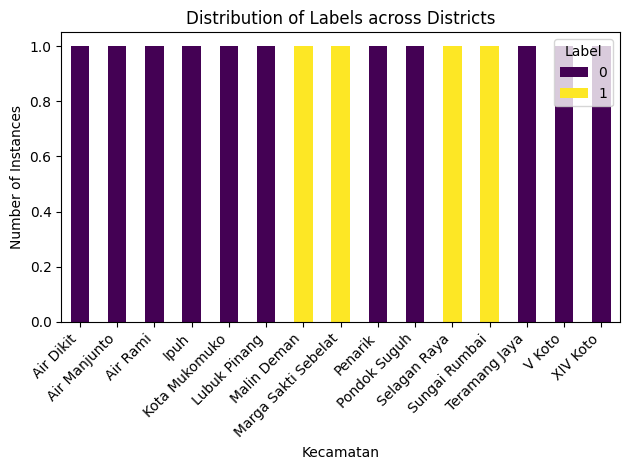

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical features distribution and relationship with 'label'
numerical_features = ['curah_hujan', 'ketinggian_lahan', 'kemiringan', 'kepadatan_penduduk', 'kejadian_banjir']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df, x=col, hue='label', kde=True, palette="Set1")
    plt.title(f'Distribution of {col} by Label')

plt.tight_layout()
plt.show()

# Descriptive statistics for numerical features grouped by 'label'
for col in numerical_features:
    print(f"\nDescriptive statistics for {col} by label:")
    print(df.groupby('label')[col].agg(['mean', 'median', 'std']))

# Relationship between 'kecamatan' and 'label'
kecamatan_label_counts = df.groupby('kecamatan')['label'].value_counts().unstack(fill_value=0)
kecamatan_label_proportions = kecamatan_label_counts.div(kecamatan_label_counts.sum(axis=1), axis=0)
print("\nProportion of labels by kecamatan:")
display(kecamatan_label_proportions)

plt.figure(figsize=(10, 6))
kecamatan_label_counts.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribution of Labels across Districts')
plt.xlabel('Kecamatan')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Label')
plt.tight_layout()
plt.show()

## Data visualization

### Subtask:
Create visualizations to explore the data distribution and relationships between variables.


**Reasoning**:
Generate histograms for numerical features colored by 'label' to visualize their distributions and use KDE for smoothing.



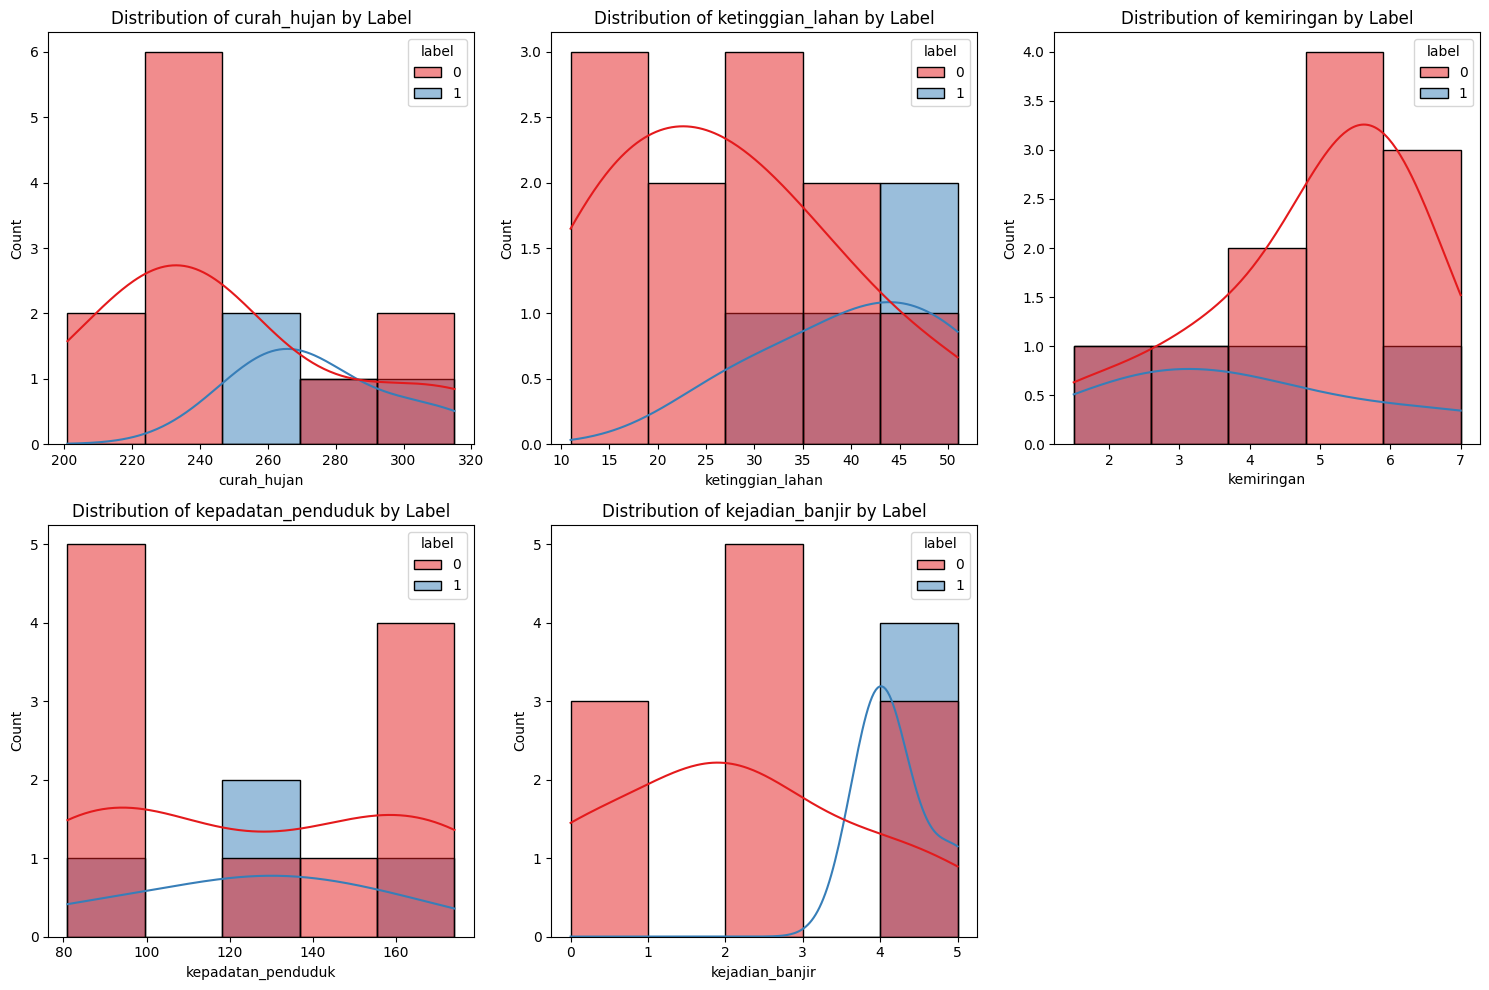

In [ ]:
numerical_features = ['curah_hujan', 'ketinggian_lahan', 'kemiringan', 'kepadatan_penduduk', 'kejadian_banjir']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df, x=col, hue='label', kde=True, palette="Set1")
    plt.title(f'Distribution of {col} by Label')
plt.tight_layout()
plt.show()

**Reasoning**:
Create box plots for numerical features, colored by 'label', to visualize distributions, quartiles, medians, and outliers.



<ipython-input-5-da2f3019bfde>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df, palette="Set2")
<ipython-input-5-da2f3019bfde>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df, palette="Set2")
<ipython-input-5-da2f3019bfde>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df, palette="Set2")
<ipython-input-5-da2f3019bfde>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and se

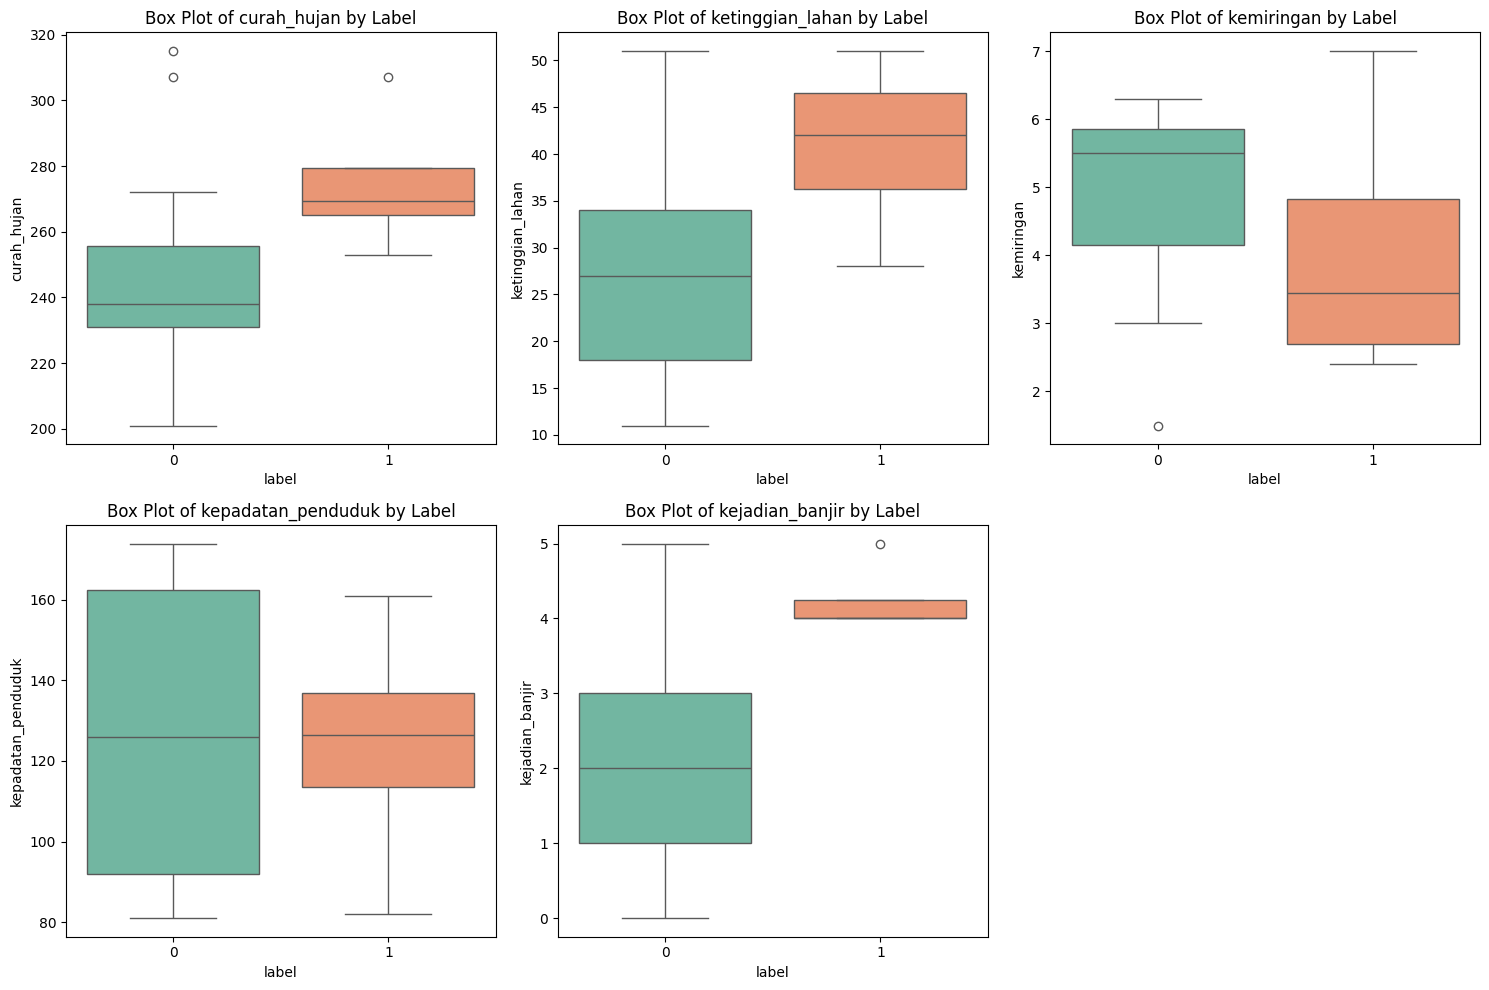

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='label', y=col, data=df, palette="Set2")
    plt.title(f'Box Plot of {col} by Label')
plt.tight_layout()
plt.show()

**Reasoning**:
Create scatter plots for pairs of numerical features, colored by 'label', to identify correlations or clusters.  Use pairplot for efficient visualization of all pairs.



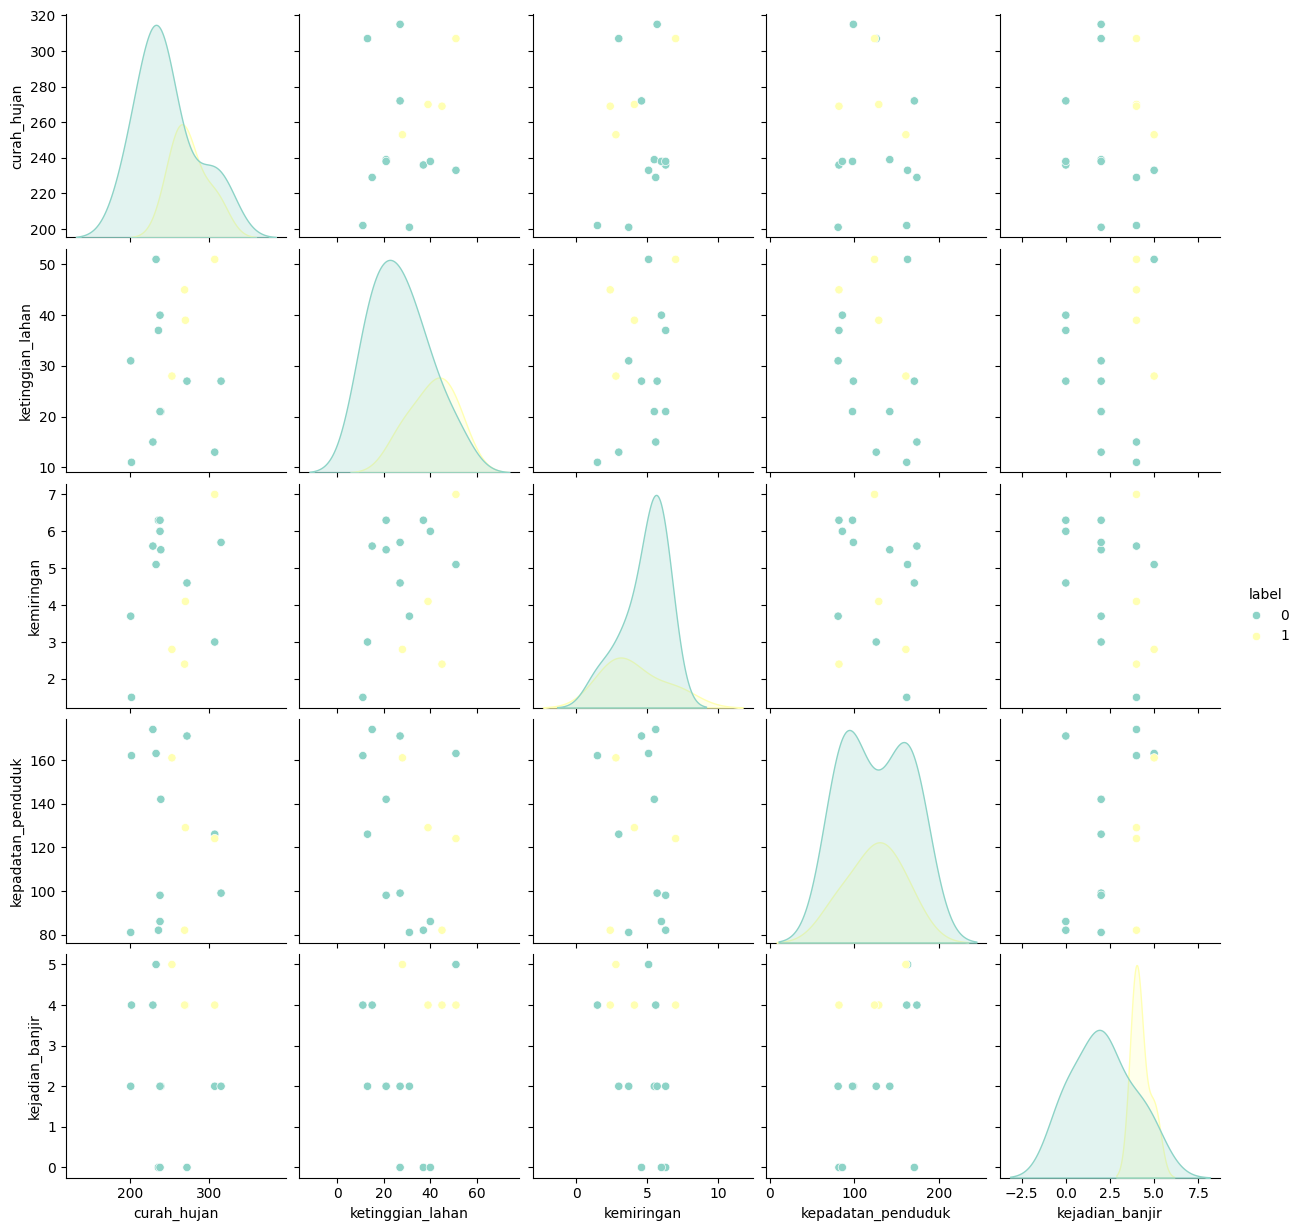

In [ ]:
sns.pairplot(df, hue='label', vars=numerical_features, palette="Set3")
plt.show()

**Reasoning**:
Create a bar chart showing the frequency of each unique value in the `kecamatan` column, colored by 'label', to observe the distribution of labels within each district.



<Figure size 1200x600 with 0 Axes>

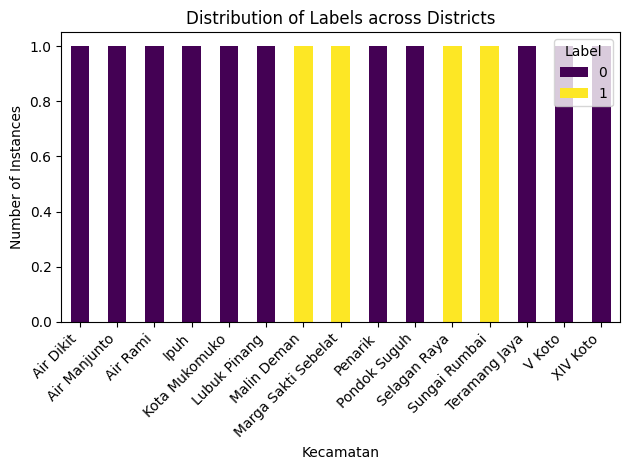

In [ ]:
kecamatan_label_counts = df.groupby('kecamatan')['label'].value_counts().unstack(fill_value=0)
plt.figure(figsize=(12, 6))
kecamatan_label_counts.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribution of Labels across Districts')
plt.xlabel('Kecamatan')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Label')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

try:
    # Gunakan path lengkap ke file
    df = pd.read_csv('/content/data_nonspasial_kecamatan_mukomuko.csv')
    print("File berhasil dimuat!")
    # display(df.head())
    # print(df.shape)

except FileNotFoundError:
    print("Error: '/content/data_nonspasial_kecamatan_mukomuko.csv' not found.")
    print("Please ensure the file is located at the specified path.")
except Exception as e:
    print(f"An error occurred while reading the file: {e}")

File berhasil dimuat!


File berhasil dimuat!

Info Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   kecamatan           15 non-null     object 
 1   curah_hujan         15 non-null     int64  
 2   ketinggian_lahan    15 non-null     int64  
 3   kemiringan          15 non-null     float64
 4   kepadatan_penduduk  15 non-null     int64  
 5   kejadian_banjir     15 non-null     int64  
 6   label               15 non-null     int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 972.0+ bytes
None

Statistik Deskriptif:
       curah_hujan  ketinggian_lahan  kemiringan  kepadatan_penduduk  \
count    15.000000         15.000000   15.000000           15.000000   
mean    253.933333         30.466667    4.640000          125.333333   
std      35.642003         13.075969    1.648722           35.346583   
min     201.000000         11.000000    

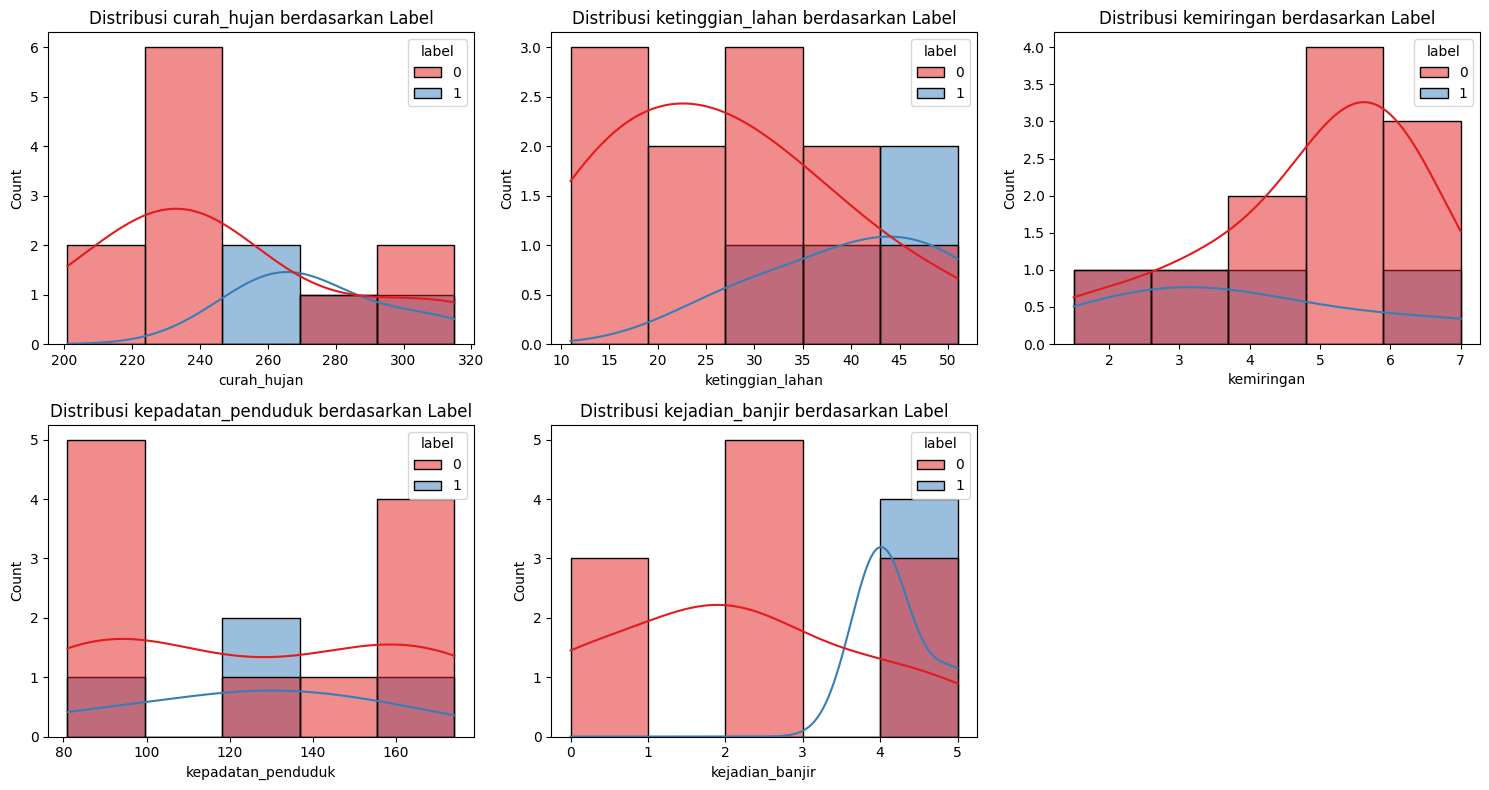


Statistik deskriptif untuk curah_hujan berdasarkan label:
             mean  median        std
label                               
0      246.363636   238.0  37.219008
1      274.750000   269.5  22.867371

Statistik deskriptif untuk ketinggian_lahan berdasarkan label:
            mean  median        std
label                              
0      26.727273    27.0  12.361965
1      40.750000    42.0   9.810708

Statistik deskriptif untuk kemiringan berdasarkan label:
           mean  median       std
label                            
0      4.845455    5.50  1.527327
1      4.075000    3.45  2.080665

Statistik deskriptif untuk kepadatan_penduduk berdasarkan label:
             mean  median        std
label                               
0      125.818182   126.0  37.846580
1      124.000000   126.5  32.444825

Statistik deskriptif untuk kejadian_banjir berdasarkan label:
           mean  median       std
label                            
0      2.090909     2.0  1.700267
1      4.250

<ipython-input-12-bbd5413c1ded>:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df, palette="Set2")
<ipython-input-12-bbd5413c1ded>:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df, palette="Set2")
<ipython-input-12-bbd5413c1ded>:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df, palette="Set2")
<ipython-input-12-bbd5413c1ded>:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to 

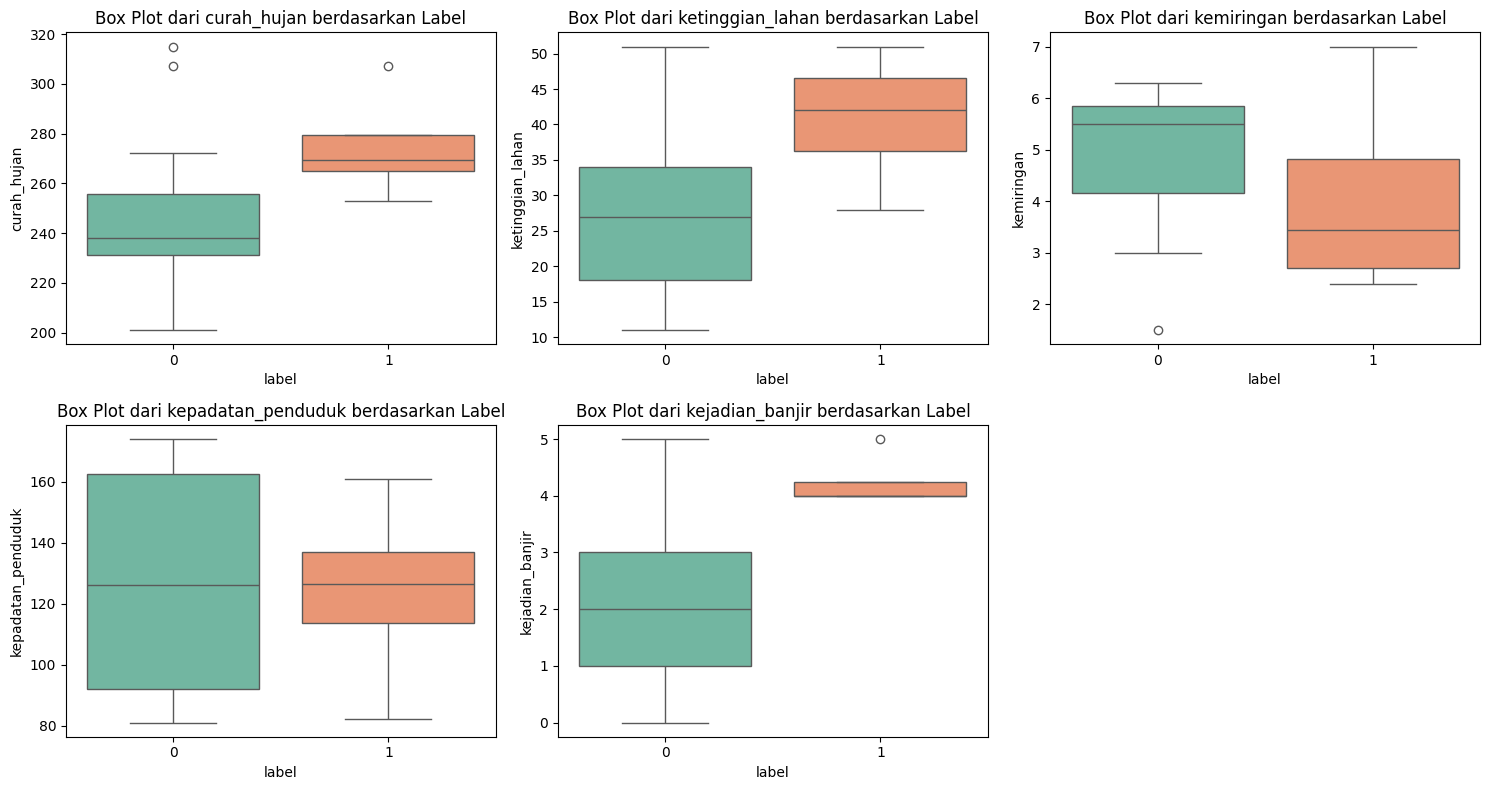


Menghasilkan pair plot...


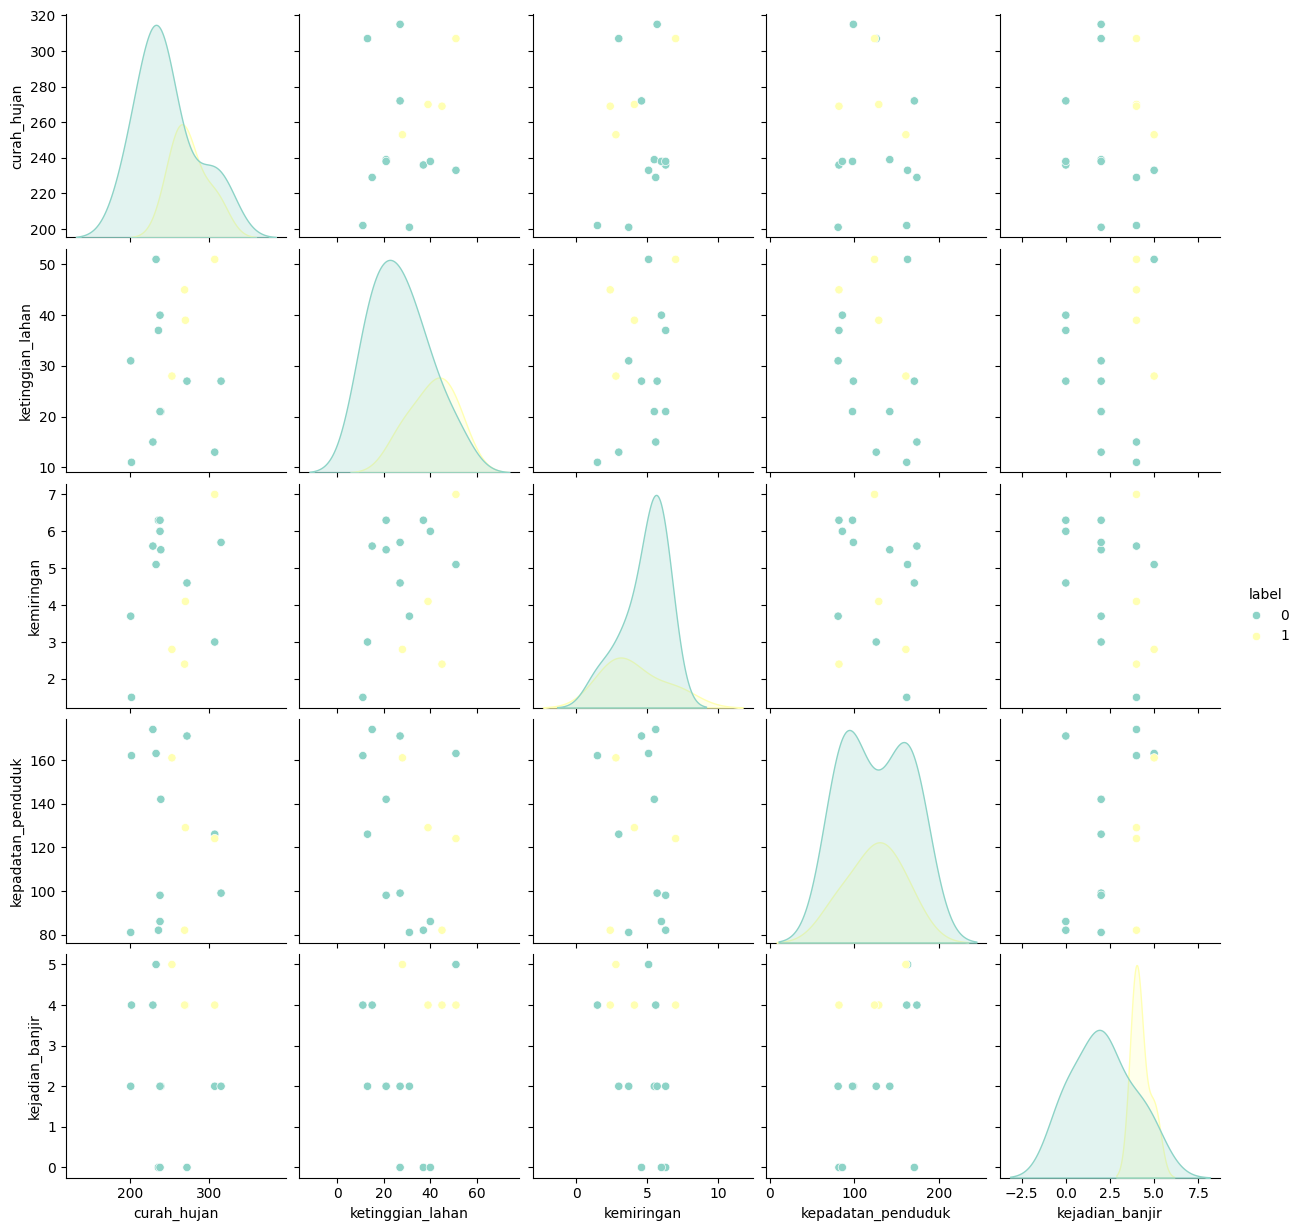


Menganalisis hubungan antara 'kecamatan' dan 'label'...

Proporsi label berdasarkan kecamatan:


label,0,1
kecamatan,,
Air Dikit,1.0,0.0
Air Manjunto,1.0,0.0
Air Rami,1.0,0.0
Ipuh,1.0,0.0
Kota Mukomuko,1.0,0.0
Lubuk Pinang,1.0,0.0
Malin Deman,0.0,1.0
Marga Sakti Sebelat,0.0,1.0
Penarik,1.0,0.0


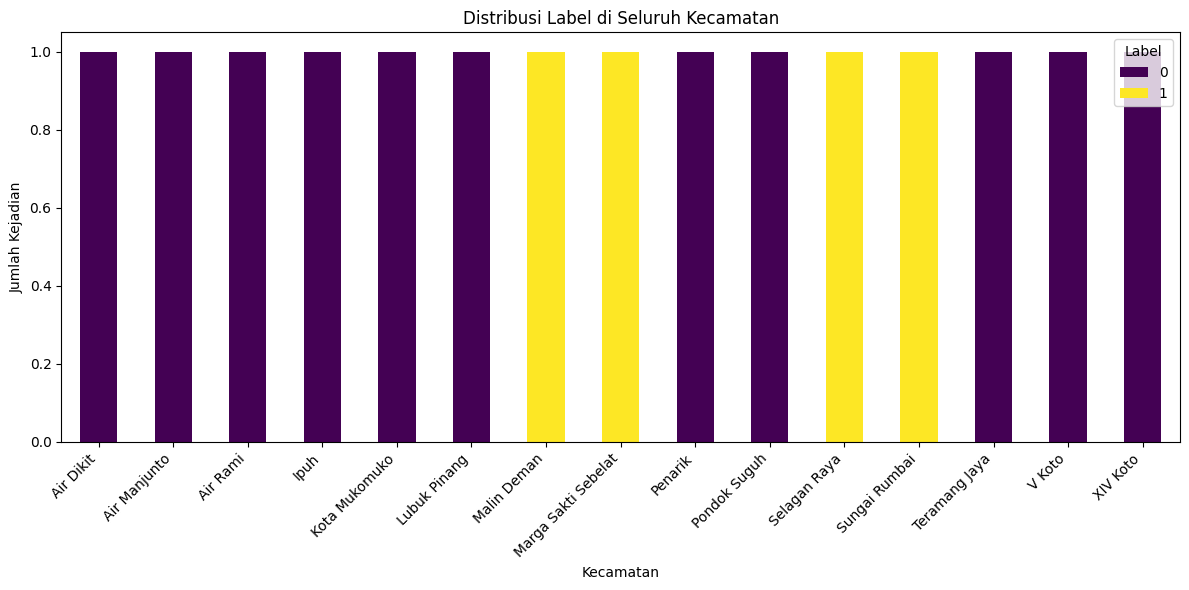


Memulai proses prediksi...
Data dibagi menjadi set pelatihan (12 baris) dan set pengujian (3 baris).

Model Logistic Regression berhasil dilatih.

Evaluasi Model pada Set Pengujian:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3


Visualisasi Confusion Matrix:


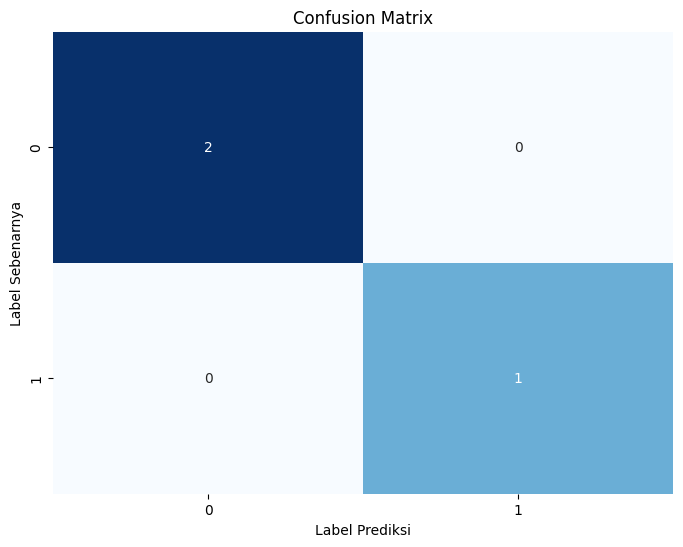


Visualisasi ROC Curve:


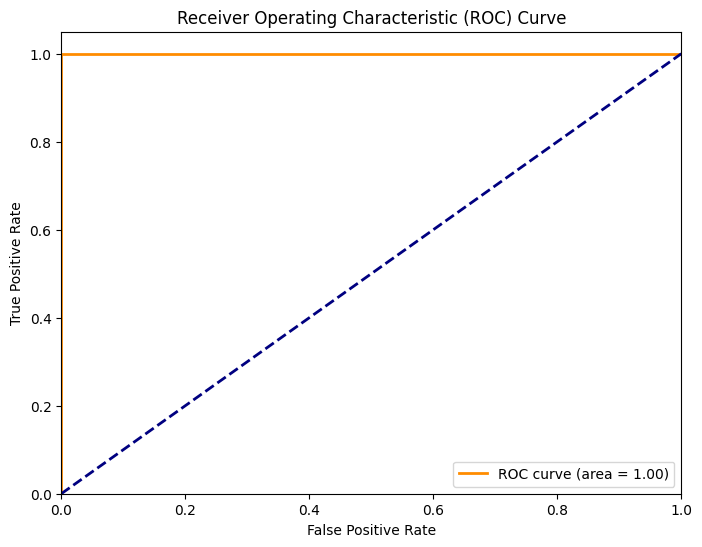

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.model_selection import train_test_split # Untuk membagi data
from sklearn.linear_model import LogisticRegression # Model klasifikasi
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc # Metrik evaluasi

try:
    # Gunakan path lengkap ke file
    df = pd.read_csv('/content/data_nonspasial_kecamatan_mukomuko.csv')
    print("File berhasil dimuat!")
    # display(df.head()) # Hapus komentar jika Anda ingin melihat head setelah dimuat
    # print(df.shape) # Hapus komentar jika Anda ingin melihat shape setelah dimuat

    # %% [markdown]
    # ## Eksplorasi Data
    #
    # ### Subtask:
    # Jelajahi dataset untuk memahami strukturnya, termasuk jumlah baris dan kolom, tipe data setiap kolom, dan statistik deskriptif. Identifikasi potensi nilai yang hilang dan outlier.
    #
    # %% [markdown]
    # **Alasan**:
    # Periksa tipe data, statistik deskriptif, nilai yang hilang, dan jumlah nilai unik untuk memahami struktur dataset dan potensi masalah.
    #
    # %%
    # Periksa tipe data
    print("\nInfo Data:")
    print(df.info())

    # Hasilkan statistik deskriptif
    print("\nStatistik Deskriptif:")
    print(df.describe())

    # Periksa nilai yang hilang
    print("\nNilai yang Hilang:")
    print(df.isnull().sum())

    # Jelajahi nilai unik dan frekuensi untuk fitur kategorikal
    # Asumsikan 'kecamatan' dan 'label' adalah kategorikal berdasarkan percobaan sebelumnya
    if 'kecamatan' in df.columns:
        print("\nJumlah Nilai untuk 'kecamatan':")
        print(df['kecamatan'].value_counts())
    if 'label' in df.columns:
        print("\nJumlah Nilai untuk 'label':")
        print(df['label'].value_counts())

    # %% [markdown]
    # ## Analisis dan Visualisasi Data (Eksplorasi Lanjutan)
    #
    # ### Subtask:
    # Analisis data untuk memahami distribusi variabel kunci dan identifikasi pola atau hubungan menarik antar variabel. Hitung statistik deskriptif untuk fitur numerikal dan jelajahi fitur kategorikal. Perhatikan secara khusus hubungan antara fitur numerikal dan kolom 'label'. Buat visualisasi untuk menjelajahi distribusi data dan hubungan antar variabel.
    #
    # %% [markdown]
    # **Alasan**:
    # Analisis distribusi fitur numerikal dan hubungannya dengan kolom 'label'. Hitung statistik deskriptif untuk setiap fitur numerikal yang dikelompokkan berdasarkan 'label'. Jelajahi hubungan antara fitur kategorikal 'kecamatan' dan 'label'. Hasilkan histogram, box plot, dan pair plot untuk visualisasi.
    #
    # %%
    # Definisikan fitur numerikal berdasarkan kode Anda sebelumnya
    numerical_features = ['curah_hujan', 'ketinggian_lahan', 'kemiringan', 'kepadatan_penduduk', 'kejadian_banjir']

    # Saring kolom numerikal yang ada di DataFrame
    existing_numerical_features = [col for col in numerical_features if col in df.columns]

    if existing_numerical_features:
        # Distribusi fitur numerikal dan hubungannya dengan 'label'
        print("\nMenganalisis fitur numerikal...")
        # Sesuaikan ukuran gambar berdasarkan jumlah plot
        plt.figure(figsize=(15, max(6, 4 * (len(existing_numerical_features) // 3 + (len(existing_numerical_features) % 3 > 0)))))
        for i, col in enumerate(existing_numerical_features):
            if 'label' in df.columns:
                # Tata letak subplot dinamis
                plt.subplot(len(existing_numerical_features)//3 + (len(existing_numerical_features)%3>0), 3, i + 1)
                sns.histplot(df, x=col, hue='label', kde=True, palette="Set1")
                plt.title(f'Distribusi {col} berdasarkan Label')
            else:
                 # Tata letak subplot dinamis
                 plt.subplot(len(existing_numerical_features)//3 + (len(existing_numerical_features)%3>0), 3, i + 1)
                 sns.histplot(df, x=col, kde=True, palette="Set1")
                 plt.title(f'Distribusi {col}')


        plt.tight_layout()
        plt.show()

        # Statistik deskriptif untuk fitur numerikal yang dikelompokkan berdasarkan 'label'
        if 'label' in df.columns:
            for col in existing_numerical_features:
                print(f"\nStatistik deskriptif untuk {col} berdasarkan label:")
                # Periksa apakah kolom label memiliki lebih dari satu nilai unik sebelum mengelompokkan
                if df['label'].nunique() > 1:
                     print(df.groupby('label')[col].agg(['mean', 'median', 'std']))
                else:
                     print(f"Hanya ada satu nilai unik di kolom 'label'. Tidak dapat mengelompokkan berdasarkan label untuk {col}.")
        else:
            print("\nKolom 'label' tidak ditemukan. Melewatkan statistik deskriptif yang dikelompokkan untuk fitur numerikal.")


        # Box plot untuk fitur numerikal
        print("\nMenghasilkan box plot...")
        # Sesuaikan ukuran gambar
        plt.figure(figsize=(15, max(6, 4 * (len(existing_numerical_features) // 3 + (len(existing_numerical_features) % 3 > 0)))))
        for i, col in enumerate(existing_numerical_features):
             if 'label' in df.columns:
                 # Tata letak subplot dinamis
                 plt.subplot(len(existing_numerical_features)//3 + (len(existing_numerical_features)%3>0), 3, i + 1)
                 sns.boxplot(x='label', y=col, data=df, palette="Set2")
                 plt.title(f'Box Plot dari {col} berdasarkan Label')
             else:
                 # Tata letak subplot dinamis
                 plt.subplot(len(existing_numerical_features)//3 + (len(existing_numerical_features)%3>0), 3, i + 1)
                 sns.boxplot(y=col, data=df, palette="Set2")
                 plt.title(f'Box Plot dari {col}')
        plt.tight_layout()
        plt.show()

        # Pair plot untuk fitur numerikal
        print("\nMenghasilkan pair plot...")
        if 'label' in df.columns:
             sns.pairplot(df, hue='label', vars=existing_numerical_features, palette="Set3")
        else:
             sns.pairplot(df, vars=existing_numerical_features, palette="Set3")
        plt.show()
    else:
        print("\nTidak ada fitur numerikal yang ditentukan ditemukan di DataFrame untuk analisis dan visualisasi.")


    # Hubungan antara 'kecamatan' dan 'label'
    if 'kecamatan' in df.columns and 'label' in df.columns:
        print("\nMenganalisis hubungan antara 'kecamatan' dan 'label'...")
        kecamatan_label_counts = df.groupby('kecamatan')['label'].value_counts().unstack(fill_value=0)
        kecamatan_label_proportions = kecamatan_label_counts.div(kecamatan_label_counts.sum(axis=1), axis=0)
        print("\nProporsi label berdasarkan kecamatan:")
        display(kecamatan_label_proportions)

        plt.figure(figsize=(12, 6))
        # Gunakan plt.gca() untuk menggambar pada gambar saat ini
        kecamatan_label_counts.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
        plt.title('Distribusi Label di Seluruh Kecamatan')
        plt.xlabel('Kecamatan')
        plt.ylabel('Jumlah Kejadian')
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='Label')
        plt.tight_layout()
        plt.show()
    else:
        print("\nKolom 'kecamatan' atau 'label' tidak ditemukan. Melewatkan analisis hubungan antara 'kecamatan' dan 'label'.")


    # %% [markdown]
    # ## Prediksi dan Visualisasi Model
    #
    # ### Subtask:
    # Siapkan data untuk pemodelan prediktif, latih model klasifikasi, buat prediksi, dan visualisasikan kinerja model.
    #
    # %% [markdown]
    # **Alasan**:
    # Gunakan model klasifikasi (Logistic Regression sebagai contoh) untuk memprediksi kolom 'label' berdasarkan fitur numerikal. Evaluasi model menggunakan metrik klasifikasi dan visualisasikan hasilnya (Confusion Matrix, ROC Curve).
    #
    # %%
    if 'label' in df.columns and existing_numerical_features:
        print("\nMemulai proses prediksi...")

        # Pilih fitur (X) dan target (y)
        # Kita hanya menggunakan fitur numerikal untuk contoh ini.
        # Untuk model yang lebih kompleks, Anda mungkin perlu melakukan One-Hot Encoding pada fitur kategorikal.
        X = df[existing_numerical_features]
        y = df['label']

        # Periksa apakah ada nilai yang hilang di X atau y sebelum membagi data
        if X.isnull().sum().sum() > 0 or y.isnull().sum() > 0:
            print("\n*Catatan: Ada nilai yang hilang di fitur atau target. Pertimbangkan untuk menangani nilai yang hilang (misalnya, imputasi) sebelum melatih model.*")
            # Untuk saat ini, kita akan menghapus baris dengan nilai yang hilang untuk memastikan model dapat dilatih.
            # Dalam skenario nyata, imputasi seringkali merupakan pendekatan yang lebih baik.
            original_rows = df.shape[0]
            df_cleaned = df.dropna(subset=existing_numerical_features + ['label'])
            X = df_cleaned[existing_numerical_features]
            y = df_cleaned['label']
            print(f"Menghapus {original_rows - df_cleaned.shape[0]} baris dengan nilai yang hilang untuk pemodelan.")
            if X.shape[0] == 0:
                 print("Setelah menghapus nilai yang hilang, tidak ada data yang tersisa untuk pemodelan. Melewatkan pemodelan.")
                 # Lompat keluar dari bagian prediksi jika tidak ada data
                 raise ValueError("Tidak ada data tersisa setelah menangani nilai yang hilang.")


        # Periksa apakah kolom target memiliki lebih dari satu kelas
        if y.nunique() < 2:
            print(f"\nHanya ada satu kelas unik ({y.unique()[0]}) di kolom target 'label'. Model klasifikasi tidak dapat dilatih.")
        else:
            # Bagi data menjadi set pelatihan dan pengujian
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # stratify=y untuk menjaga proporsi label

            print(f"Data dibagi menjadi set pelatihan ({X_train.shape[0]} baris) dan set pengujian ({X_test.shape[0]} baris).")

            # Inisialisasi dan latih model Logistic Regression
            # Pastikan data Anda diskalakan jika menggunakan model yang sensitif terhadap skala (seperti Logistic Regression atau SVM).
            # Untuk saat ini, kita akan menggunakannya tanpa scaling, tetapi perlu diingat untuk perbaikan di masa mendatang.
            model = LogisticRegression(random_state=42)
            model.fit(X_train, y_train)

            print("\nModel Logistic Regression berhasil dilatih.")

            # Buat prediksi pada set pengujian
            y_pred = model.predict(X_test)
            y_pred_proba = model.predict_proba(X_test)[:, 1] # Probabilitas untuk kelas positif

            # Evaluasi model
            print("\nEvaluasi Model pada Set Pengujian:")
            print(classification_report(y_test, y_pred))

            # Visualisasi Confusion Matrix
            print("\nVisualisasi Confusion Matrix:")
            cm = confusion_matrix(y_test, y_pred)
            plt.figure(figsize=(8, 6))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
            plt.xlabel('Label Prediksi')
            plt.ylabel('Label Sebenarnya')
            plt.title('Confusion Matrix')
            plt.show()

            # Visualisasi ROC Curve (hanya untuk klasifikasi biner)
            # Pastikan 'label' adalah biner (0/1 atau sejenisnya) untuk ROC curve
            if len(y.unique()) == 2:
                print("\nVisualisasi ROC Curve:")
                fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
                roc_auc = auc(fpr, tpr)

                plt.figure(figsize=(8, 6))
                plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
                plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
                plt.xlim([0.0, 1.0])
                plt.ylim([0.0, 1.05])
                plt.xlabel('False Positive Rate')
                plt.ylabel('True Positive Rate')
                plt.title('Receiver Operating Characteristic (ROC) Curve')
                plt.legend(loc="lower right")
                plt.show()
            else:
                print("\nROC Curve hanya berlaku untuk klasifikasi biner. Kolom 'label' memiliki lebih dari 2 kelas.")


    elif 'label' not in df.columns:
         print("\nKolom target 'label' tidak ditemukan di DataFrame. Melewatkan proses prediksi.")
    else: # existing_numerical_features is empty
         print("\nTidak ada fitur numerikal yang ditentukan ditemukan di DataFrame untuk pemodelan. Melewatkan proses prediksi.")


except FileNotFoundError:
    print("Error: '/content/data_nonspasial_kecamatan_mukomuko.csv' tidak ditemukan.")
    print("Pastikan file berada di path yang ditentukan.")
except ValueError as ve:
     print(f"Error selama proses prediksi: {ve}")
except Exception as e:
    print(f"Terjadi kesalahan selama analisis atau pemodelan: {e}")